# FFT tests

- environment helio5 see heliocats/envs

-  Determine flux rope type automatically with FFT - look at the phase of By and Bz and compare to ideal phase values for the 8 types, for both Bz and By 

- if successfull, would enable to automatically characterize flux rope types within the solar cycle as in the ICMECAT - for forecasting of flux rope type probability when seeing the event progressively in real time (instead of 3DCORE fits)

check
https://stackoverflow.com/questions/58475809/how-to-recover-amplitude-and-phase-shift-from-fourier-transform-in-numpy

- may use scipy as it has more function than np.fft https://docs.scipy.org/doc/scipy/reference/fft.html#module-scipy.fft

https://pythontic.com/visualization/signals/fouriertransform_fft

https://www.cbcity.de/die-fft-mit-python-einfach-erklaert

see
https://angeo.copernicus.org/articles/36/1275/2018/ matching of observations with model - anderer Zugang um 3DCORE mit parts in real time zu matchen


ISSUES: 

-normalization necessary?

- at the very bottom: figure out how to recover the value of the phase shift from the fft results, look at mathematics, then the problem is solved: then you know what the phase shift is and you can use the different categorizations for flux rope types

---

**MIT LICENSE**

Copyright 2024, Christian Moestl

Permission is hereby granted, free of charge, to any person obtaining a copy of this 
software and associated documentation files (the "Software"), to deal in the Software
without restriction, including without limitation the rights to use, copy, modify, 
merge, publish, distribute, sublicense, and/or sell copies of the Software, and to 
permit persons to whom the Software is furnished to do so, subject to the following 
conditions:

The above copyright notice and this permission notice shall be included in all copies 
or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, 
INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT 
HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF 
CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE 
OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as datetime
from sunpy.time import parse_time

In [2]:
#load ICMECAT
ic_path='/Users/chris/python/heliocats/icmecat/'
url='https://helioforecast.space/static/sync/icmecat/HELIO4CAST_ICMECAT_v22.csv'
ic=pd.read_csv(url)
ic

,Unnamed: 0,icmecat_id,sc_insitu,icme_start_time,mo_start_time,mo_end_time,mo_sc_heliodistance,mo_sc_long_heeq,mo_sc_lat_heeq,icme_duration,...,mo_density_mean,mo_density_std,mo_temperature_mean,mo_temperature_std,sheath_speed_mean,sheath_speed_std,sheath_density_mean,sheath_density_std,sheath_pdyn_mean,sheath_pdyn_std
0,0,ICME_STEREO_A_MOESTL_20240116_01,STEREO-A,2024-01-16T13:04Z,2024-01-16T14:24Z,2024-01-17T00:23Z,0.9676,7.14,-5.42,11.32,...,6.4,1.3,0.0,0.0,310.1,5.9,11.4,2.9,1.8,0.4
1,1,ICME_Wind_MOESTL_20231217_01,Wind,2023-12-17T06:56Z,2023-12-17T21:40Z,2023-12-18T03:14Z,0.9736,-0.17,-1.16,20.30,...,7.9,2.4,16812.7,6452.9,502.6,27.2,17.7,3.0,7.5,1.4
2,2,ICME_STEREO_A_MOESTL_20231216_01,STEREO-A,2023-12-16T06:04Z,2023-12-16T06:04Z,2023-12-16T23:03Z,0.9676,6.68,-1.94,16.98,...,2.0,0.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ICME_STEREO_A_MOESTL_20231215_01,STEREO-A,2023-12-15T12:19Z,2023-12-15T22:21Z,2023-12-16T05:52Z,0.9676,6.67,-1.90,17.55,...,2.5,0.9,0.0,0.0,358.5,20.4,9.8,3.6,2.1,0.7
4,4,ICME_Wind_MOESTL_20231215_01,Wind,2023-12-15T10:52Z,2023-12-15T22:44Z,2023-12-16T10:56Z,0.9739,-0.18,-0.91,24.07,...,6.4,2.6,38536.4,26763.3,441.5,38.8,17.5,10.2,5.5,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,1664,ICME_ULY_RICHARDSON_19910305_01,ULYSSES,1991-03-05T00:00Z,1991-03-05T00:00Z,1991-03-08T20:00Z,2.2833,-41.33,-3.42,92.00,...,1.3,1.1,25501.7,11677.5,NaN,NaN,NaN,NaN,NaN,NaN
1665,1665,ICME_ULY_RICHARDSON_19910226_01,ULYSSES,1991-02-26T22:00Z,1991-02-26T22:00Z,1991-02-27T17:00Z,2.2166,-36.80,-3.26,19.00,...,0.9,0.4,65951.4,24933.2,NaN,NaN,NaN,NaN,NaN,NaN
1666,1666,ICME_ULY_RICHARDSON_19910116_01,ULYSSES,1991-01-16T16:00Z,1991-01-16T16:00Z,1991-01-18T11:00Z,1.7583,-9.09,-1.75,43.00,...,0.9,0.1,55306.4,21032.7,NaN,NaN,NaN,NaN,NaN,NaN
1667,1667,ICME_ULY_RICHARDSON_19901225_01,ULYSSES,1990-12-25T14:00Z,1990-12-25T14:00Z,1990-12-28T12:00Z,1.5160,2.18,-0.49,70.00,...,1.8,1.1,52144.3,36250.8,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#load data

#file='stereoa_2007_now_rtn.p'
#file='stereoa_beacon_rtn_last_300days_now.p'
#file='stereoa_beacon_rtn_last_35days_now.p'

file='wind_1995_now_rtn.p'

data_path='/Users/chris/python/data/insitu_python/'

#file='noaa_rtsw_last_35files_now.p'

#file='solo_rtn_test.p'
#file='psp_rtn_test.p'

#file='ulysses_1990_2009_rtn.p'

#file='juno_2011_2016_rtn.p'
#file='juno_2011_2016_rtn_old.p'


#file='omni_1963_now.p'

[sc,header]=pickle.load(open(data_path+file, "rb" ) ) 

#cutout array for these dates
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2023,12,31)


#scnum=mdates.date2num(sc.time)
startind=np.argmin(abs(start-sc.time))
endind=np.argmin(abs(end-sc.time))

sc=sc[startind:endind]


## Analysis

In [4]:
ic
wi=np.where(ic.sc_insitu=='Wind')[0]
#wi


#extract MO for given CME

#1 SWN event

test='ICME_Wind_WEILER_20230423_01'
testi=np.where(ic.icmecat_id==test)[0][0]
icstart=parse_time(ic.mo_start_time[testi]).datetime
icend=parse_time(ic.mo_end_time[testi]).datetime
startind=np.argmin(abs(icstart-sc.time))
endind=np.argmin(abs(icend-sc.time))
sc2=sc[startind:endind]

#convert to numeric time
sc2_nt=mdates.date2num(sc2.time)
#t in days from start
t2=(sc2_nt-sc2_nt[0])
bz2=sc2.bz
by2=sc2.by
N2=len(t2)


#2 NES event

test='ICME_Wind_MOESTL_20210910_01'
testi=np.where(ic.icmecat_id==test)[0][0]
icstart=parse_time(ic.mo_start_time[testi]).datetime
icend=parse_time(ic.mo_end_time[testi]).datetime
startind=np.argmin(abs(icstart-sc.time))
endind=np.argmin(abs(icend-sc.time))
sc3=sc[startind:endind]

#convert to numeric time
sc3_nt=mdates.date2num(sc3.time)
#t in days from start
t3=(sc3_nt-sc3_nt[0])
bz3=sc3.bz
by3=sc3.by
N3=len(t3)


#need to interpolate over nan values, fix here quickly for demo
#np.where(np.isfinite(bz3)==False)
bz3[245]=2
by3[245]=-10


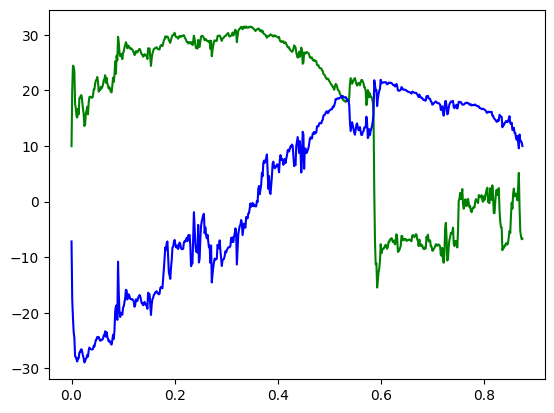

In [5]:
#plt.plot(sc.time,sc.bz)

plt.plot(t2,by2,'g')
plt.plot(t2,bz2,'b')

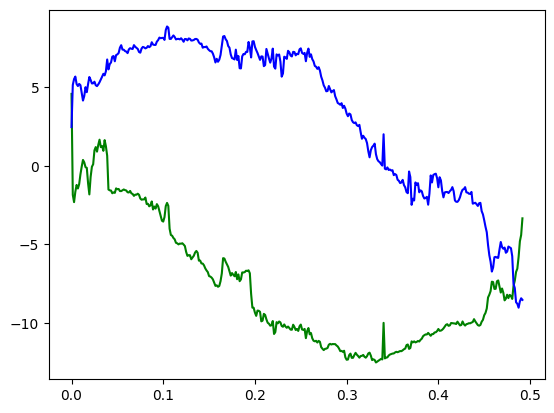

In [6]:
plt.plot(t3,by3,'g')
plt.plot(t3,bz3,'b')

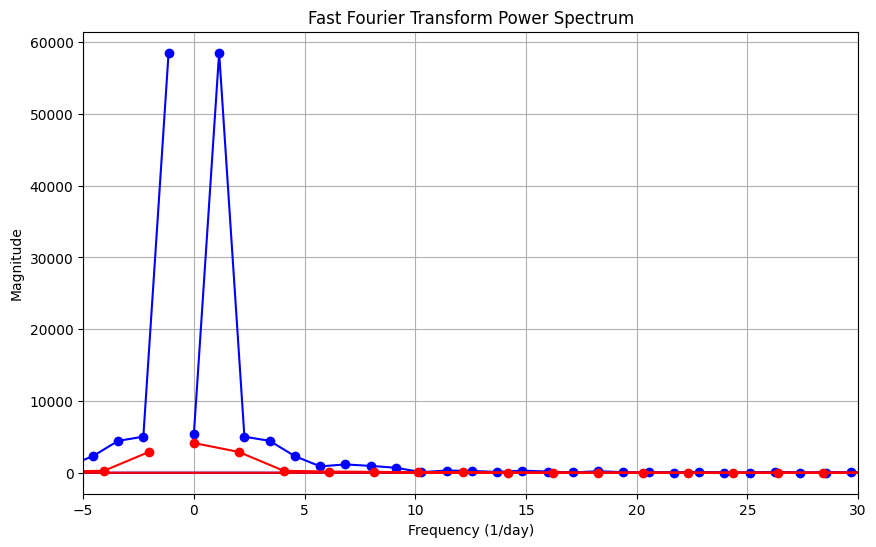

In [7]:
def fft_signal(time, amplitude):
    # Perform the FFT
    fft_result = np.fft.fft(amplitude)
    
    # Calculate the frequencies
    freq = np.fft.fftfreq(len(time), time[1] - time[0])
    
    return freq, fft_result




# Plot the magnitude of the FFT result
plt.figure(figsize=(10, 6))

freq2z, fft2z=fft_signal(t2,bz2)
freq2y, fft2y=fft_signal(t2,by2)

freq3z, fft3z=fft_signal(t3,bz3)
freq3y, fft3y=fft_signal(t3,by3)


#power spectrum
fpow2z=np.abs(fft2z)**2/N2
fpow2y=np.abs(fft2y)**2/N2

fpow3z=np.abs(fft3z)**2/N3
fpow3y=np.abs(fft3y)**2/N3


plt.plot(freq2z, fpow2z,'ob')
plt.plot(freq2z, fpow2z,'-b')

plt.plot(freq3z, fpow3z,'or')
plt.plot(freq3z, fpow3z,'-r')


plt.xlabel('Frequency (1/day)')
plt.ylabel('Magnitude')
plt.xlim(-5,30)
plt.title('Fast Fourier Transform Power Spectrum')
plt.grid(True)
plt.show()  
    
    

In [8]:
print()

#freq2z, fft2z
#fft2z[1].real/N2  #amplitude
#fft2z[1].imag/N2  #phase


##normalize???

print('Event 1 is SWN')
#print('FFT results for frequency at 1', fft2z[1].real/N2, fft2z[1].imag/N2)
print('Bz Phase for Event 1 in pi',np.round(fft2z[1].imag/N2/np.pi,2))
print('By Phase for Event 1 in pi',np.round(fft2y[1].imag/N2/np.pi,2))

print('')
print('')
print('Event 2 is NES')
#print('FFT results for frequency at 1', fft3z[1].real/N2, fft3z[1].imag/N2)
print('Bz Phase for Event 2 in pi',np.round(fft3z[1].imag/N3/np.pi,2))
print('By Phase for Event 2 in pi',np.round(fft3y[1].imag/N3/np.pi,2))




Event 1 is SWN
Bz Phase for Event 1 in pi 2.86
By Phase for Event 1 in pi -2.74


Event 2 is NES
Bz Phase for Event 2 in pi -0.79
By Phase for Event 2 in pi -0.63


#### Need to plot result over data to check the phase

(0.0, 1.0)

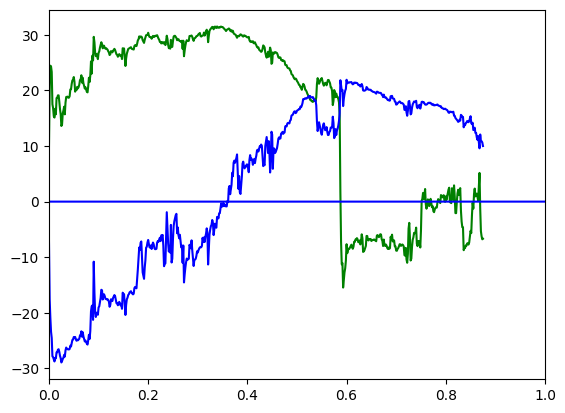

In [9]:
plt.plot(t2,by2,'g')
plt.plot(t2,bz2,'b')

#this is wrong
ffty=np.sin(t2*freq2z[1]+fft3y[1].imag)
plt.plot(t2,'b')
plt.xlim(0,1)


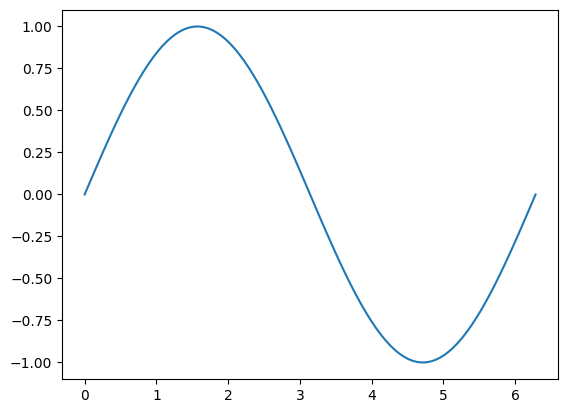

In [10]:
x=np.linspace(0,1,100)*2*np.pi
y=np.sin(x)
plt.plot(x,y)

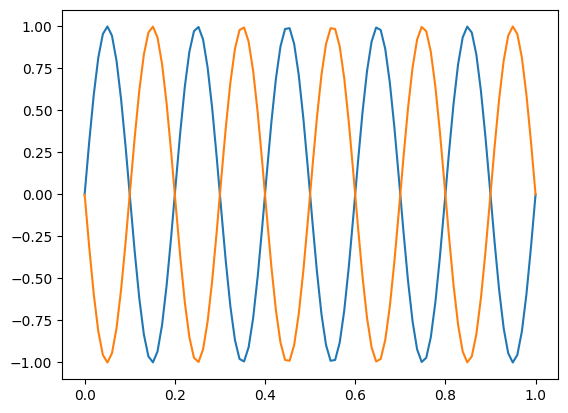

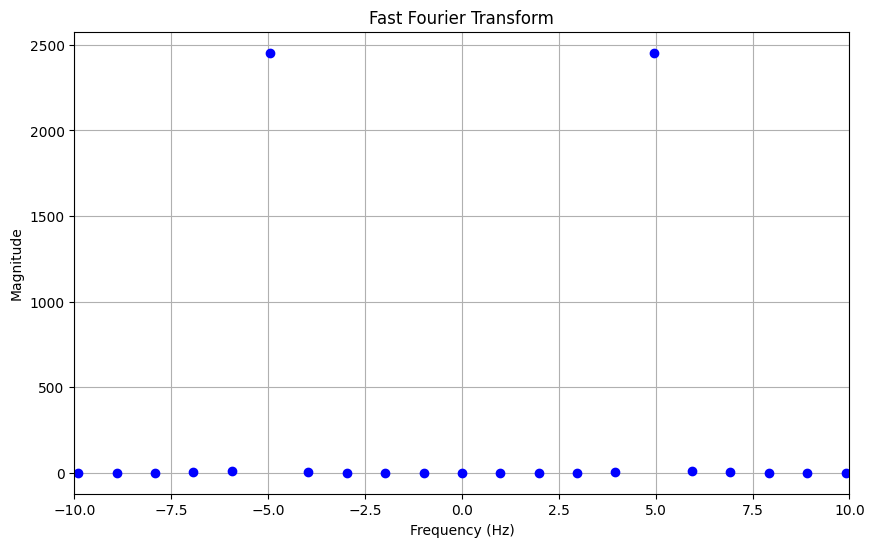

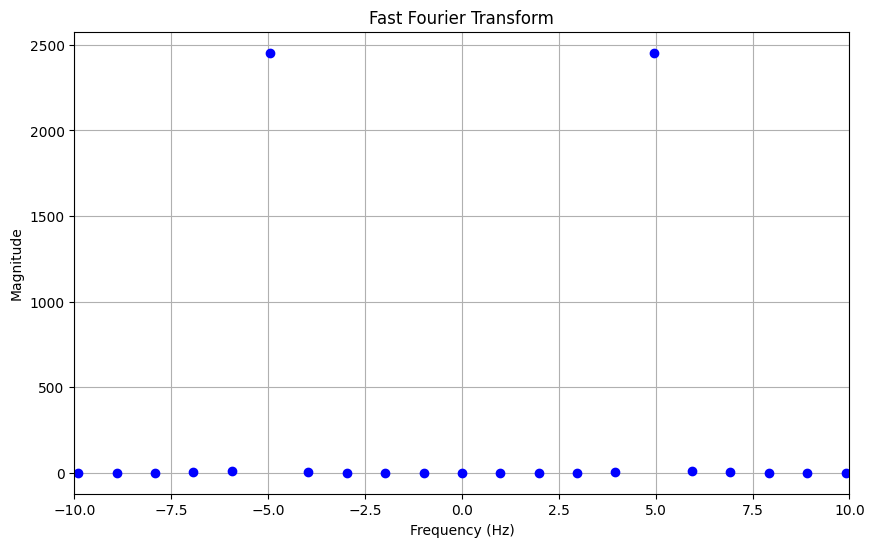

In [65]:
def fft_signal(time, amplitude):
    # Perform the FFT
    fft_result = np.fft.fft(amplitude)
    
    # Calculate the frequencies
    freq = np.fft.fftfreq(len(time), time[1] - time[0])
    
    return freq, fft_result

def plot_fft(freq, fft_result):
    # Plot the magnitude of the FFT result
    plt.figure(figsize=(10, 6))
    plt.plot(freq, np.abs(fft_result)**2,'ob')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(-10,10)
    plt.title('Fast Fourier Transform')
    plt.grid(True)
    plt.show()

# Example usage
# Define time and amplitude variables
time = np.linspace(0, 1, 100)  # 1 second signal sampled at 1000 Hz
frequency = 5  # 5 Hz sine wave

#phase=np.pi/2

phase=np.pi


amplitude = np.sin(2 * np.pi * frequency * time)  # 5 Hz sine wave
amplitude_phase_shift = np.sin(2 * np.pi * frequency * time + phase)  # 5 Hz sine wave


# Perform FFT
freq, fft_result = fft_signal(time, amplitude)

freq2, fft_result2 = fft_signal(time, amplitude_phase_shift)


plt.plot(time, amplitude)
plt.plot(time, amplitude_phase_shift)

# Plot FFT
plot_fft(freq, fft_result)
plot_fft(freq2, fft_result2)



In [66]:
print('At frequency',freq[5])

#imaginary part gives the phase
print(fft_result[5].imag)
print(fft_result2[5].imag)

#real part gives the amplitude
#print()
#print(fft_result[5].real)
#print(fft_result2[5].real)


At frequency 4.95
-48.92621220237385
48.92621220237385


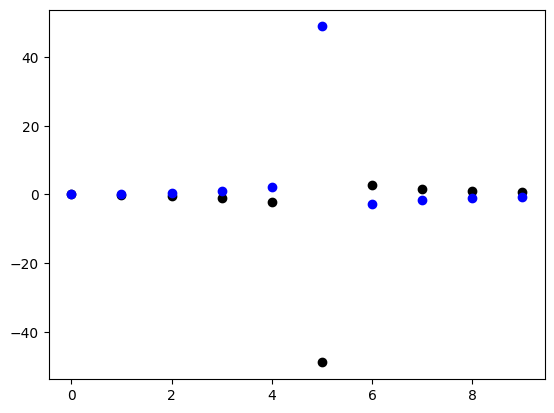

In [67]:

plt.plot(fft_result[0:10].imag,'ok')
plt.plot(fft_result2[0:10].imag,'ob')


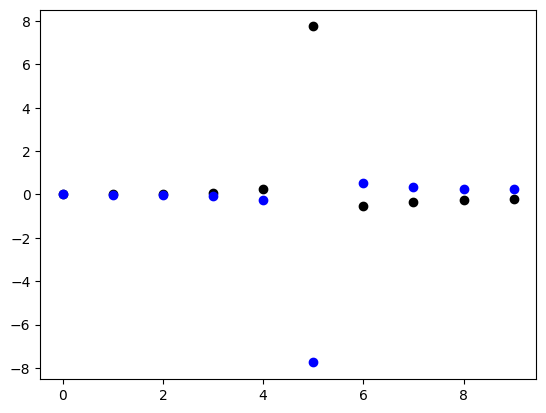

In [68]:

plt.plot(fft_result[0:10].real,'ok')
plt.plot(fft_result2[0:10].real,'ob')

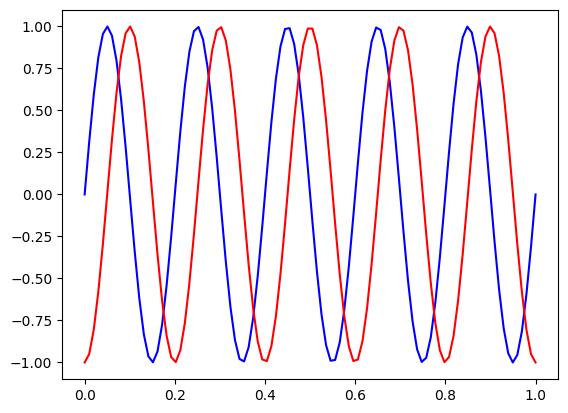

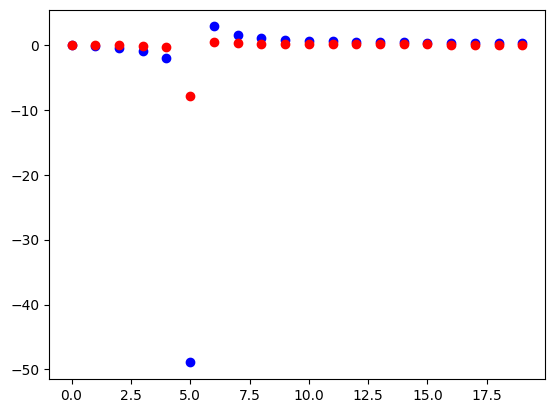

In [93]:

#simple test only fft.fft 

time = np.linspace(0, 1, 100)  # 1 second signal sampled at 1000 Hz
frequency = 5  # 5 Hz sine wave
phase_shift=3*np.pi/2
amplitude = np.sin(2 * np.pi * frequency * time)  # 5 Hz sine wave
amplitude_phase_shift = np.sin(2 * np.pi * frequency * time + phase_shift)  # 5 Hz sine wave

plt.figure(1)
plt.plot(time,amplitude,'b')
plt.plot(time,amplitude_phase_shift,'r')



fft_result_t1 = np.fft.fft(amplitude)
fft_result_t2 = np.fft.fft(amplitude_phase_shift)

plt.figure(2)
plt.plot(fft_result_t1[0:20].imag,'ob')
plt.plot(fft_result_t2[0:20].imag,'or')

#plot needed imag part against phase shift
